# Automatic Speech Recognition Hand-on & Advanced Kaldi Toolkit Courses
by Yuan-Fu Liao, National Taipei University of Technology
* yfliao@ntut.edu.tw
---

# Introduction to Orthgonal Expansion for Pitch Contour Modeling

In [0]:
!pip install orthopy

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import orthopy

# Pitch Contour

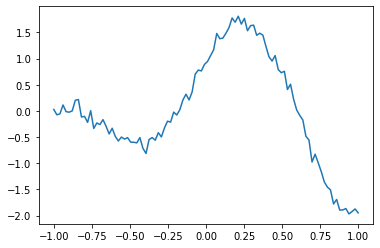

In [0]:
# contour to br apporximated
l = 100
x = np.linspace(-1,1,l)
y = np.sin(x*5)+np.cos(x*3-0.1)+0.1*np.random.normal(size=l)
plt.plot(x,y)

# Basis

In [0]:
# orthgonal basis, order=4
# alpha=beta=1 # Jacobi, Gegenbauer (α=β)
# alpha=beta=-0.5 # Chebyshev 1 (α=β=-1/2)
# alpha=beta=0.5 # Chebyshev 2 (α=β=1/2)
alpha=beta=0 # Legendre (α=β=0)
vals = orthopy.line_segment.tree_jacobi(x, 5, alpha, beta, "normal", symbolic=False)
p = np.asarray(vals).T
print(p.shape)

(100, 6)


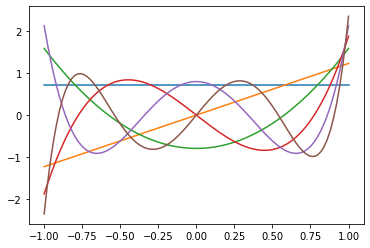

In [0]:
plt.plot(x,p[:,:])

In [0]:
# check the bias
b = np.sum(p, axis=0)
print(b)

[7.07106781e+01 8.21565038e-15 1.59710993e+00 1.46549439e-14
 2.19274017e+00 1.42108547e-14]


# Projecttion

In [0]:
# project y to p
print(x.shape, y.shape, p.shape)
z=np.sum(p.T*y, axis=1)/l*2
print(z)

(100,) (100,) (100, 6)
[ 0.02793804 -0.19720827 -0.95274454 -0.91883411  0.18637384  0.44041617]


# Rescontruction

In [0]:
# reconstruct y from basis p and projection z
yy = np.sum(p*z,axis=1)
print(yy.shape)

(100,)


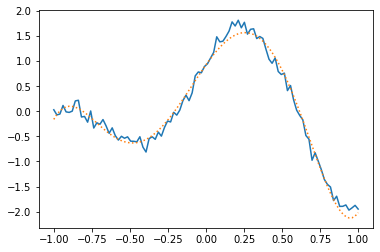

In [0]:
plt.plot(x,y,'-',x,yy,':')